In [53]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
original_df = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.5.csv', parse_dates=['date'])
original_df.head()

,date,density,global_cc
0,2020-04-15,0.595238,0.154921
1,2020-04-16,0.557143,0.154286
2,2020-04-17,0.471429,0.153016
3,2020-04-18,0.414286,0.155556
4,2020-04-19,0.328571,0.169524


In [56]:
comparsion_df = original_df.copy()
for threshold in [0.4, 0.5, 0.6]:
    gittered_df = pd.read_csv(f'../netstats/processed/d_corr-netstats-threshold-{threshold}.csv', parse_dates=['date'])
    comparsion_df = comparsion_df.merge(gittered_df, how='inner', on='date', suffixes=[None, f'_{threshold}'])
comparsion_df.head()

top_density = comparsion_df.nlargest(30, 'density_0.4')
print("Top 30 Dates with Highest Network Density:")
print(top_density[['date', 'density_0.4']])

# Identify the top 5 dates for clustering coefficient
top_clustering = comparsion_df.nlargest(30, 'global_cc_0.4')
print("\nTop 30 Dates with Highest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc_0.4']])

top_density = comparsion_df.nlargest(30, 'density')
print("Top 30 Dates with Highest Network Density:")
print(top_density[['date', 'density']])

# Identify the top 5 dates for clustering coefficient
top_clustering = comparsion_df.nlargest(30, 'global_cc')
print("\nTop 30 Dates with Highest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc']])

top_density = comparsion_df.nlargest(30, 'density_0.6')
print("Top 30 Dates with Highest Network Density:")
print(top_density[['date', 'density_0.6']])

# Identify the top 5 dates for clustering coefficient
top_clustering = comparsion_df.nlargest(30, 'global_cc_0.6')
print("\nTop 30 Dates with Highest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc_0.6']])



Top 30 Dates with Highest Network Density:
          date  density_0.4
0   2020-04-15     0.738095
1   2020-04-16     0.709524
2   2020-04-17     0.671429
3   2020-04-18     0.585714
11  2020-04-26     0.471429
4   2020-04-19     0.461905
49  2020-06-03     0.461905
50  2020-06-04     0.461905
51  2020-06-05     0.461905
156 2020-09-18     0.461905
7   2020-04-22     0.452381
8   2020-04-23     0.452381
12  2020-04-27     0.452381
52  2020-06-06     0.452381
6   2020-04-21     0.442857
10  2020-04-25     0.433333
48  2020-06-02     0.433333
42  2020-05-27     0.423810
155 2020-09-17     0.423810
9   2020-04-24     0.414286
13  2020-04-28     0.414286
41  2020-05-26     0.414286
45  2020-05-30     0.414286
112 2020-08-05     0.414286
47  2020-06-01     0.404762
111 2020-08-04     0.404762
114 2020-08-07     0.404762
117 2020-08-10     0.404762
134 2020-08-27     0.404762
5   2020-04-20     0.395238

Top 30 Dates with Highest Clustering Coefficient:
          date  global_cc_0.4
19  2020

In [61]:
comparsion_df = original_df.copy()
for threshold in [0.4,0.5, 0.6]:
    gittered_df = pd.read_csv(f'../netstats/processed/d_corr-netstats-threshold-{threshold}.csv', parse_dates=['date'])
    comparsion_df = comparsion_df.merge(gittered_df, how='inner', on='date', suffixes=[None, f'_{threshold}'])
comparsion_df.head()

top_clustering = comparsion_df.nsmallest(30, 'global_cc_0.4')
print("\n 10 Dates with the lowest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc_0.4']])

top_clustering = comparsion_df.nsmallest(30, 'density_0.4')
print("\n 10 Dates with the lowest network density:")
print(top_clustering[['date', 'density_0.4']])


 10 Dates with the lowest Clustering Coefficient:
          date  global_cc_0.4
193 2020-10-25       0.104127
328 2021-03-09       0.104762
311 2021-02-20       0.109841
269 2021-01-09       0.111746
334 2021-03-15       0.113651
194 2020-10-26       0.115556
270 2021-01-10       0.116190
335 2021-03-16       0.117460
279 2021-01-19       0.118730
333 2021-03-14       0.120000
191 2020-10-23       0.120635
271 2021-01-11       0.121270
327 2021-03-08       0.121270
310 2021-02-19       0.123810
216 2020-11-17       0.124444
326 2021-03-07       0.125079
192 2020-10-24       0.125714
195 2020-10-27       0.125714
245 2020-12-16       0.126984
0   2020-04-15       0.128889
196 2020-10-28       0.128889
197 2020-10-29       0.128889
266 2021-01-06       0.129524
267 2021-01-07       0.129524
198 2020-10-30       0.130159
331 2021-03-12       0.130159
268 2021-01-08       0.131429
312 2021-02-21       0.132063
190 2020-10-22       0.133968
189 2020-10-21       0.134603

 10 Dates with the

In [58]:
word_bank = {
    pd.to_datetime('2020-04-15'): 'Mass testing',
    pd.to_datetime('2020-08-02'): '100k cases',
    pd.to_datetime('2020-09-11'): 'Signed Bayanihan to Recover act',
    pd.to_datetime('2021-01-05'): 'Alpha Variant',
    pd.to_datetime('2021-03-05'): 'Beta Variant'
}


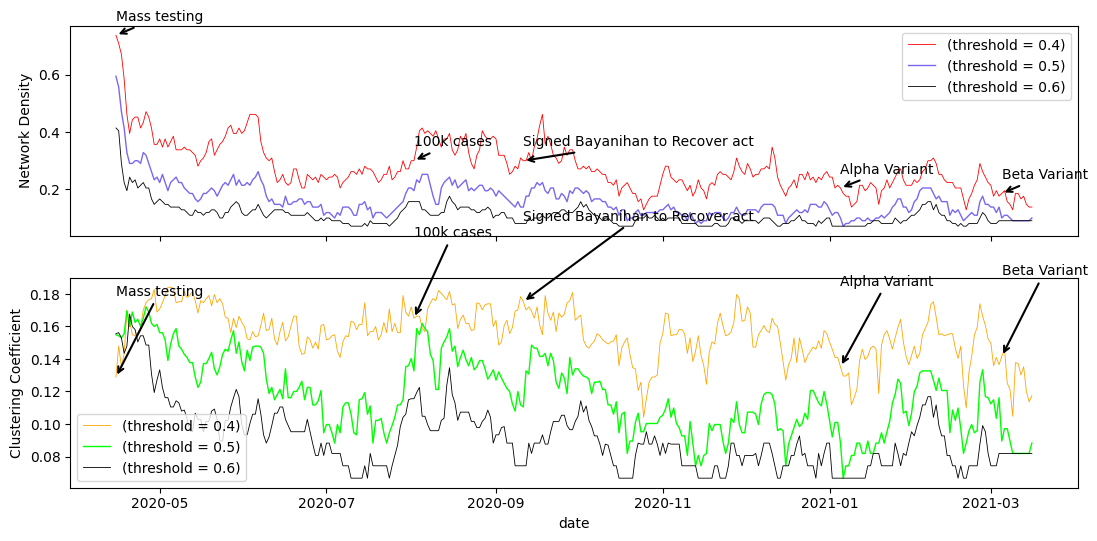

In [62]:
#fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10, 5))
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(13, 6))

#Plot Density
sns.lineplot(x='date', y='density_0.4', data=comparsion_df, ax=ax[0], color="red", linewidth=0.6, label="(threshold = 0.4)")
sns.lineplot(x='date', y='density', data=comparsion_df, ax=ax[0], color='mediumslateblue', linewidth=1, label="(threshold = 0.5)")
sns.lineplot(x='date', y='density_0.6', data=comparsion_df, ax=ax[0], color="black", linewidth=0.6, label="(threshold = 0.6)")
ax[0].set_ylabel('Network Density')

sns.lineplot(x='date', y='global_cc_0.4', data=comparsion_df, ax=ax[1], color='orange', linewidth=0.6, label="(threshold = 0.4)")
sns.lineplot(x='date', y='global_cc', data=comparsion_df, ax=ax[1], color='lime', linewidth=1, label="(threshold = 0.5)")
sns.lineplot(x='date', y='global_cc_0.6', data=comparsion_df, ax=ax[1], color='black', linewidth=0.6, label="(threshold = 0.6)")
ax[1].set_ylabel('Clustering Coefficient')


        # Annotate the graph with words from the word bank

# Annotate the graph for Clustering Coefficient with closer arrows
for date, annotation_text in word_bank.items():
    if date in comparsion_df['date'].values:  # Check if the date exists in the DataFrame
        plt.annotate(annotation_text, 
                     xy=(date, comparsion_df.loc[comparsion_df['date'] == date, 'global_cc_0.4'].values[0]), 
                     xytext=(date, comparsion_df.loc[comparsion_df['date'] == date, 'global_cc_0.4'].values[0] + 0.05),  # Closer offset for clustering coefficient
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # Arrow properties
                     fontsize=10,
                     color='black')
for date, annotation_text in word_bank.items():
    if date in comparsion_df['date'].values:  # Check if the date exists in the DataFrame
        ax[0].annotate(annotation_text, 
                        xy=(date, comparsion_df.loc[comparsion_df['date'] == date, 'density_0.4'].values[0]), 
                        xytext=(date, comparsion_df.loc[comparsion_df['date'] == date, 'density_0.4'].values[0] + 0.05),  # Closer offset for network density
                        arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # Arrow properties
                        fontsize=10,
                        color='black')

    
plt.savefig("../../graphs/Figure_02_2_d_corr_Netstats-Sensitivity_Analysis.pdf", bbox_inches='tight')
plt.savefig("../../graphs/Figure_02_2_d_corr_Netstats-Sensitivity_Analysis.png", bbox_inches='tight')
plt.show()

In [60]:
df = pd.read_csv('./../msvs/processed/msvs/gt.csv', parse_dates=['date'])

# Filter the DataFrame for the specified date range
start_date = pd.to_datetime('2020-04-15')
end_date = pd.to_datetime('2021-03-16')
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Cap values at 100
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].clip(upper=100)

# Identify the top 5 dates for network density
top_density = df_filtered.nlargest(5, 'density')
print("Top 5 Dates with Highest Network Density:")
print(top_density[['date', 'density']])

# Identify the top 5 dates for clustering coefficient
top_clustering = df_filtered.nlargest(5, 'global_cc')
print("\nTop 5 Dates with Highest Clustering Coefficient:")
print(top_clustering[['date', 'global_cc']])

KeyError: 'density'